# Stable Diffusion


## Using Stable Diffusion for Image Generation  

We will now explore how to use Stable Diffusion to generate images from text prompts. The process involves four key settings:  

- **Model**: A trained or fine-tuned model optimized for specific image types.  
- **Prompt**: A textual description of the desired image.  
- **Negative Prompt**: Specifies elements to exclude from the image.  
- **Seed**: Ensures reproducibility; the same seed with identical prompts yields the same image. Changing the seed generates variations.

In [2]:
!pip install --upgrade diffusers[torch]
!pip install k_diffusion
!pip install transformers scipy ftfy accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 117.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 41.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

## Setting Up Stable Diffusion (Basic Model)

To use Stable Diffusion, we will set up the Hugging Face `DiffusionPipeline` with the **"CompVis/stable-diffusion-v1-4"** model, a standard version for Stable Diffusion. The following code initializes and downloads the model from Hugging Face.  


In [3]:
from diffusers import DiffusionPipeline
import torch

pipe = DiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    custom_pipeline="lpw_stable_diffusion",
    torch_dtype=torch.float16
)
pipe=pipe.to("cuda")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

v0.32.2/lpw_stable_diffusion.py:   0%|          | 0.00/74.7k [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

***This pipeline does contain code to ensure that no images generated are "not safe for work" (NSFW). You can uncomment the `pipe.safety_checker` to get around the limitation.***

  0%|          | 0/50 [00:00<?, ?it/s]

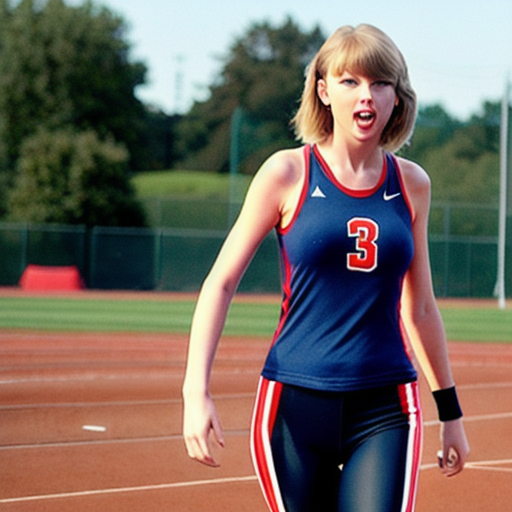

In [28]:
import random
# -1 for random seed
seed = -1
seed = random.randint(0, 2**32) if seed == -1 else seed
generator = torch.Generator(device='cuda').manual_seed(int(seed))

# Prompts to generate
prompt= """
taylor swift as an athlete"""

neg_prompt = """
signature, watermark
"""

#pipe.safety_checker = lambda images, clip_input: (images, False)
pipe.text2img(prompt, negative_prompt=neg_prompt, width=512,height=512,
              max_embeddings_multiples=3,generator=generator).images[0]

## Realistic Models  

To generate more lifelike images of people, it is better to use a model like **Realistic Vision** instead of the previous one. The following code loads Realistic Vision.  


In [13]:
from diffusers import DiffusionPipeline
import torch

pipe = DiffusionPipeline.from_pretrained(
    #'hakurei/waifu-diffusion',
    "SG161222/Realistic_Vision_V2.0",
    custom_pipeline="lpw_stable_diffusion",
    generator=generator,
    torch_dtype=torch.float16
)
pipe=pipe.to("cuda")

model_index.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.89k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

Keyword arguments {'generator': <torch._C.Generator object at 0x7905a241ce10>} are not expected by StableDiffusionLongPromptWeightingPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--SG161222--Realistic_Vision_V2.0/snapshots/aaa388343c7f35f6416eea9d29574a4d1ad59817/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--SG161222--Realistic_Vision_V2.0/snapshots/aaa388343c7f35f6416eea9d29574a4d1ad59817/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--SG161222--Realistic_Vision_V2.0/snapshots/aaa388343c7f35f6416eea9d29574a4d1ad59817/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--SG161222--Realistic_Vision_V2.0/snapshots/aaa388343c7f35f6416eea9d29574a4d1ad59817/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


We now generate an image with a much more complex prompt. The positive and negative prompts describe how to generate an image of a young woman. Stable diffusion prompts are usually comma separated lists of attributes to draw. You will notice that some are enclosed in paranthesis; which designates that this attribute is more important. A number, near the end, separated by a colon specifies how important.

  0%|          | 0/50 [00:00<?, ?it/s]

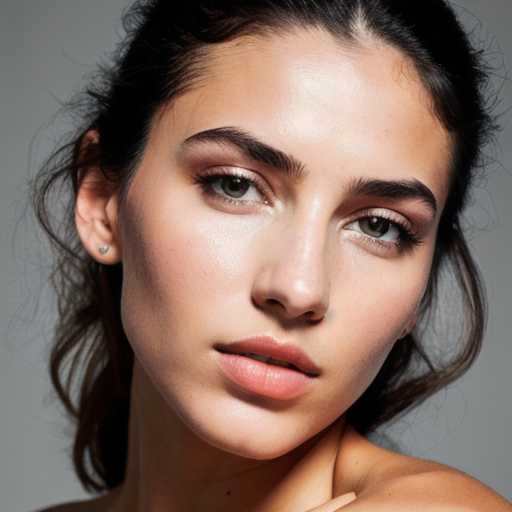

In [26]:
# Random number seed, -1 for random seed
seed = -1 #-1
seed = random.randint(0, 2**32) if seed == -1 else seed
generator = torch.Generator(device='cuda').manual_seed(int(seed))

# Prompts to generatem
prompt= """
(Balkan girl in her early twenties), RAW, 8K, ultra-realistic model photography,
ray-traced shadows, studio lighting, cinematic depth,
(highly detailed skin:1.3), (sub-surface scattering:1.55), (sweat:1.2), (freckles:0.6),
(perfectly detailed eyes), (natural complexion, no makeup), (soft film grain),
(realistic skin pores:1.1), (minor acne & eczema:0.7), (realistic facial asymmetry),
(FACE2:1.2), (FACE3:0.85), (FACE1:0.5),
high-end beauty photography, Vogue editorial style, Hasselblad camera,
sharp focus, natural light reflections, physically accurate textures."""

neg_prompt = """
signature, watermark, airbrush, photoshop, plastic doll,
(ugly eyes, deformed iris, deformed pupils, fused lips and teeth:1.2),
(un-detailed skin, semi-realistic, cgi, 3d, render, sketch, cartoon,
drawing, anime:1.2), text, close up, cropped, out of frame, worst quality,
low quality, jpeg artifacts, ugly, duplicate, morbid, mutilated, extra fingers,
mutated hands, poorly drawn hands, poorly drawn face, mutation, deformed, blurry,
dehydrated, bad anatomy, bad proportions, extra limbs, cloned face, disfigured,
gross proportions, malformed limbs, missing arms, missing legs, extra arms,
extra legs, fused fingers, too many fingers, long neck, head wear, masculine,
obese, fat, out of frame"""

pipe.safety_checker = lambda images, clip_input: (images, False)
pipe.text2img(prompt, negative_prompt=neg_prompt, width=512,height=512,
              max_embeddings_multiples=3,generator=generator).images[0]

In [27]:
import torch
import random
from PIL import Image

num_images = 15

for i in range(num_images):
    # New random seed
    seed = random.randint(0, 2**32)
    generator = torch.Generator(device='cuda').manual_seed(seed)

    image = pipe.text2img(
        prompt=prompt,
        negative_prompt=neg_prompt,
        width=512,
        height=512,
        max_embeddings_multiples=3,
        generator=generator
    ).images[0]

    filename = f"{seed}.png"
    image.save(filename)
    print(f"Saved image: {filename}")


  0%|          | 0/50 [00:00<?, ?it/s]

Saved image: 3901221944.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved image: 885114245.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved image: 2802724886.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved image: 4235930359.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved image: 3825872414.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved image: 1926283858.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved image: 1004525147.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved image: 3340412421.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved image: 1795594041.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved image: 1483678646.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved image: 1736225462.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved image: 2524001449.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved image: 1805760640.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved image: 3895199790.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved image: 2669840008.png
